Aprendizado Não-Supervisonado (Clustering)

k-Means Clustering

In [29]:
#importar as bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [31]:
data = pd.read_csv('store.csv')

In [32]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
#traduzir colunas
data.columns=['IdCliente', 'Genero', 'Idade', 'Renda Anual',
       'Nivel de Gasto (1-100)']

In [34]:
data.head()

,IdCliente,Genero,Idade,Renda Anual,Nivel de Gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
#transformar o IdCliente em index
data.set_index('IdCliente',inplace=True)

In [36]:
data

,Genero,Idade,Renda Anual,Nivel de Gasto (1-100)
IdCliente,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [38]:
# selecionar apenas a renda anual e nível de gasto
df=data[['Renda Anual','Nivel de Gasto (1-100)']]

In [39]:
df

,Renda Anual,Nivel de Gasto (1-100)
IdCliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


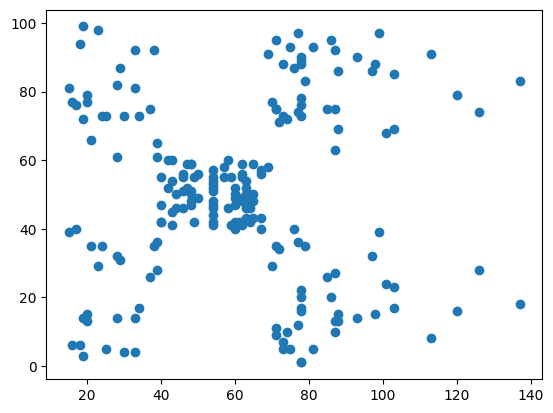

In [40]:
#visualizar as duas colunas no scatter plot (gráfico de dispersão)
plt.scatter(df['Renda Anual'],df['Nivel de Gasto (1-100)'])
plt.show()

# Identificar a quantidade de Clusters
Método Elbow (cotovelo) 

In [42]:
from sklearn .cluster import KMeans

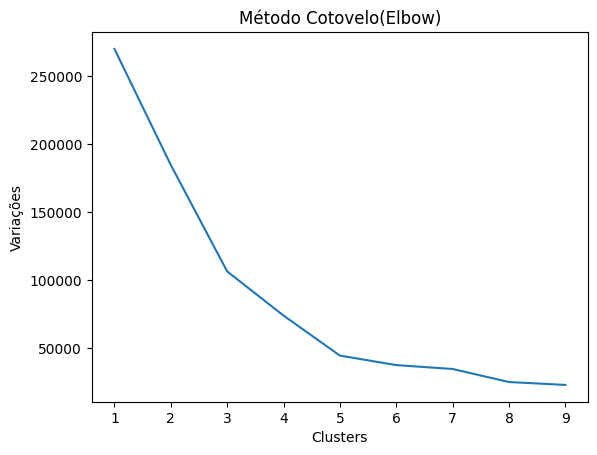

In [45]:
#saber quanto os dados varia de acordo com quantidade de clusters
variacoes = []
x=df.values
for i in  range (1,10):
    kmeans = KMeans(n_clusters= i, init ='k-means++')
    kmeans.fit(x)
    variacoes.append(kmeans.inertia_)
plt.plot(range(1,10),variacoes)
plt.title('Método Cotovelo(Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()


In [46]:
kmeans_final = KMeans (n_clusters=5)

In [47]:
#fazer um fit para treinar com os dados
kmeans_final.fit(x)

KMeans(n_clusters=5)

In [50]:
#predição dos clusters
cluster_pred = kmeans_final.predict(x)


In [51]:
cluster_pred #saída: cada elemento de 0 a  4 será equivalente a um  clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3,
       0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [52]:
#gerar o centro de cada clusters
clusters_centro = kmeans_final. cluster_centers_

In [53]:
clusters_centro #saída : ponto central que divide o clusters

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513]])

In [62]:
#pegar apenas valores referente ao salario anual dos clusters que foram classificado como 0(zero)
x[cluster_pred==0, 0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39])

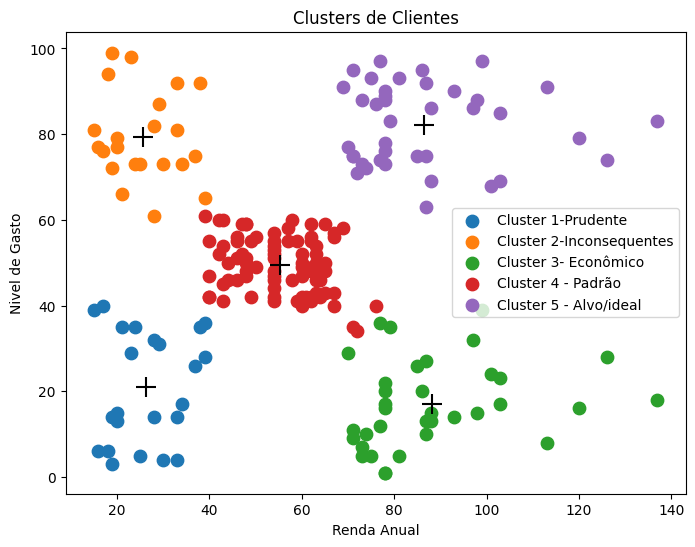

In [97]:
#plotar a Renda Anual e o Nivel de Gasto
plt.figure(figsize=(8,6))

plt.scatter(x[cluster_pred==0, 0],x[cluster_pred==0, 1],s=80,label ='Cluster 1-Prudente') 
plt.scatter(x[cluster_pred==1, 0],x[cluster_pred==1, 1],s=80,label ='Cluster 2-Inconsequentes') 
plt.scatter(x[cluster_pred==2, 0],x[cluster_pred==2, 1],s=80,label ='Cluster 3- Econômico') 
plt.scatter(x[cluster_pred==3, 0],x[cluster_pred==3, 1],s=80,label ='Cluster 4 - Padrão') 
plt.scatter(x[cluster_pred==4, 0],x[cluster_pred==4, 1],s=80,label ='Cluster 5 - Alvo/ideal') 
plt.scatter(clusters_centro[:,0],clusters_centro[:,1],marker='+',s=200,color='black')
plt.legend()
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nivel de Gasto')
plt.show()